
# Midterm Project CS675 Scaleable Database


 
### Analyzing New York City Data utilizing SQL, Python, and Version Control


## Project Overview

**The main goal of this project is to analyze three NYPD datasets to gain insights about public safety in New York City. Data Science tools such Python, SQL, and Git to clean, retrieve, and analyze data on the following dataset**




**Project Goal**: - The end goal is to uncover patterns and trends that can help law enforcement and policymakers make data-driven decisions and keep New York City residence safety and reduce the crime

#### Data Sets use for this project __(https://catalog.data.gov/dataset)__

1. NYPD Hatecrime
2. NYPD Shooting
3. NYPD Arrest


#### Procedures

1. Import the necessary Libraries
2. Read in an view all three data set
3. Clean and Transform Data set using Pandas and numpy libraries
3. Data Exploration using Matplotlib and Seaborn libraries
4. Conclusion
5. Limitation and Recomemdation


### Team Members: Nuzhut Prova, Ramaya and Sunita Inderjit, Srikant Reddy





# 1. NYPD Arrest Data

#### Business Questions

1. Borough with the most arrest
2. Age with highest arrest
3. Top Offense by Borough
4. Arrest over time


In [1]:
# Import the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read in the dataset

df_arrests= pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")

df_arrests.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


## Data Preparation

In [74]:
df_arrests.shape

(5498650, 19)

In [6]:
df_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

In [7]:
df_arrests.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [10]:
df_arrests.corr()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
ARREST_KEY,1.000000,-0.013561,-0.014826,-0.002515,-0.003812,0.000184,-0.001621,0.000127,-0.001403
PD_CD,-0.013561,1.000000,0.092619,0.070216,0.019884,0.025495,-0.060800,-0.039334,0.010848
KY_CD,-0.014826,0.092619,1.000000,-0.022176,-0.007693,-0.011794,0.010359,0.006778,-0.004911
ARREST_PRECINCT,-0.002515,0.070216,-0.022176,1.000000,-0.034832,0.276397,-0.485530,-0.306245,0.105658
JURISDICTION_CODE,-0.003812,0.019884,-0.007693,-0.034832,1.000000,0.005024,0.024038,0.014822,0.002636
X_COORD_CD,0.000184,0.025495,-0.011794,0.276397,0.005024,1.000000,0.272079,0.259065,0.288751
Y_COORD_CD,-0.001621,-0.060800,0.010359,-0.485530,0.024038,0.272079,1.000000,0.649964,0.092357
Latitude,0.000127,-0.039334,0.006778,-0.306245,0.014822,0.259065,0.649964,1.000000,-0.639461
Longitude,-0.001403,0.010848,-0.004911,0.105658,0.002636,0.288751,0.092357,-0.639461,1.000000


In [77]:
df_arrests.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  874
PD_DESC               9169
KY_CD                 9739
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           22001
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [11]:
df_arrests.duplicated().sum()

0

In [12]:
df_arrests.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

## Data Cleaning

In [80]:

# Convert 'Arrest Date' to datetime format (where applicable)

df_arrests['ARREST_DATE'] = pd.to_datetime(df_arrests['ARREST_DATE'], errors='coerce')

# Check the data types of all columns to confirm changes

df_arrests.dtypes

ARREST_KEY                    int64
ARREST_DATE          datetime64[ns]
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE           float64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                  float64
Y_COORD_CD                  float64
Latitude                    float64
Longitude                   float64
Lon_Lat                      object
dtype: object

In [13]:
# Impute missing values with '0' and 'NA'

df_arrests['ARREST_DATE'].fillna(0,inplace=True)
df_arrests['KY_CD'].fillna(0, inplace=True)
df_arrests['PD_CD'].fillna(0, inplace=True)
df_arrests['PD_DESC'].fillna('NA', inplace=True)
df_arrests['OFNS_DESC'].fillna('NA', inplace=True)
df_arrests['X_COORD_CD'].fillna(0, inplace=True)
df_arrests['Y_COORD_CD'].fillna(0, inplace=True)

df_arrests

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)


In [14]:
# converting float to int 
df_arrests['PD_CD'] = df_arrests['PD_CD'].apply(np.int64)
df_arrests['KY_CD'] = df_arrests['KY_CD'].apply(np.int64)
df_arrests.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                         int64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [15]:
df_arrests['PERP_SEX'] = df_arrests['PERP_SEX'].replace({'F': 'Female', 'M': 'Male'})
df_arrests['ARREST_BORO'] = df_arrests['ARREST_BORO'].replace({'M': 'Manhattan', 'B': 'Bronx', 'Q': 'Queens', 'K': 'Kings', 'S': 'Staten Island'})
df_arrests

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200501,F,Kings,77,0,45-64,Female,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117,DANGEROUS DRUGS,PL 2203901,F,Kings,73,0,25-44,Male,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Kings,62,0,25-44,Male,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Manhattan,32,0,25-44,Male,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 12005WX,F,Kings,71,0,25-44,Male,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601002,F,Bronx,52,0,25-44,Male,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233,SEX CRIMES,PL 2601001,M,Bronx,47,0,25-44,Female,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881,OTHER TRAFFIC INFRACTION,VTL051101A,M,Staten Island,122,0,25-44,Male,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,Kings,62,0,25-44,Male,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)


## Data Exploration

In [16]:
df_arrests['OFNS_DESC'].value_counts()

ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
                                  ...  
DISRUPTION OF A RELIGIOUS SERV        2
HOMICIDE-NEGLIGENT-VEHICLE            2
FELONY SEX CRIMES                     2
UNLAWFUL POSS. WEAP. ON SCHOOL        1
ADMINISTRATIVE CODES                  1
Name: OFNS_DESC, Length: 64, dtype: int64

# Q1. Borough with highest number of arrest

In [17]:
df_arrests['ARREST_BORO'].value_counts()

Kings            46825
Bronx            39957
Manhattan        39652
Queens           36246
Staten Island     7415
Name: ARREST_BORO, dtype: int64

# Q2. Age group with highet arrest

In [18]:
df_arrests['AGE_GROUP'].value_counts()

25-44    97601
45-64    33416
18-24    30036
<18       6245
65+       2797
Name: AGE_GROUP, dtype: int64

In [19]:
df_arrests.groupby(['ARREST_BORO'])

In [20]:
group_grp = df_arrests.groupby(['ARREST_BORO'])

# Q3 Top offense by Borough

In [21]:
group_grp['OFNS_DESC'].value_counts()

ARREST_BORO    OFNS_DESC                     
Bronx          ASSAULT 3 & RELATED OFFENSES      6838
               FELONY ASSAULT                    4259
               PETIT LARCENY                     3808
               VEHICLE AND TRAFFIC LAWS          2443
               ROBBERY                           2279
                                                 ... 
Staten Island  THEFT-FRAUD                          2
               ANTICIPATORY OFFENSES                1
               GAMBLING                             1
               HOMICIDE-NEGLIGENT,UNCLASSIFIE       1
               OFFENSES AGAINST PUBLIC SAFETY       1
Name: OFNS_DESC, Length: 282, dtype: int64

In [22]:
group_grp['OFNS_DESC'].describe()

,count,unique,top,freq
ARREST_BORO,,,,
Bronx,39957,59,ASSAULT 3 & RELATED OFFENSES,6838
Kings,46825,58,ASSAULT 3 & RELATED OFFENSES,6680
Manhattan,39652,58,PETIT LARCENY,6387
Queens,36246,60,ASSAULT 3 & RELATED OFFENSES,5746
Staten Island,7415,47,ASSAULT 3 & RELATED OFFENSES,992


In [43]:
group_grp['AGE_GROUP'].value_counts()

ARREST_BORO    AGE_GROUP
Bronx          25-44        22834
               18-24         7716
               45-64         7209
               <18           1681
               65+            517
Kings          25-44        27037
               45-64         9080
               18-24         8278
               <18           1752
               65+            678
Manhattan      25-44        22404
               45-64         9027
               18-24         6267
               <18           1185
               65+            769
Queens         25-44        21241
               45-64         6575
               18-24         6464
               <18           1253
               65+            713
Staten Island  25-44         4085
               45-64         1525
               18-24         1311
               <18            374
               65+            120
Name: AGE_GROUP, dtype: int64

In [44]:
group_grp[['PERP_RACE','PERP_SEX' ]].value_counts()

ARREST_BORO    PERP_RACE                       PERP_SEX
Bronx          BLACK                           Male        14766
               WHITE HISPANIC                  Male         9107
               BLACK HISPANIC                  Male         6017
               BLACK                           Female       3416
               WHITE HISPANIC                  Female       2254
                                                           ...  
Staten Island  UNKNOWN                         Female         20
               BLACK HISPANIC                  U              14
               ASIAN / PACIFIC ISLANDER        U               6
               AMERICAN INDIAN/ALASKAN NATIVE  Female          5
                                               U               2
Length: 105, dtype: int64

In [28]:

group_grp['PD_DESC'].describe()

,count,unique,top,freq
ARREST_BORO,,,,
Bronx,39957,191,ASSAULT 3,4790
Kings,46825,203,ASSAULT 3,4768
Manhattan,39652,204,"LARCENY,PETIT FROM OPEN AREAS,",6357
Queens,36246,184,ASSAULT 3,4303
Staten Island,7415,135,"TRAFFIC,UNCLASSIFIED MISDEMEAN",783


In [29]:

group_grp['PD_DESC'].value_counts()

ARREST_BORO    PD_DESC                       
Bronx          ASSAULT 3                         4790
               LARCENY,PETIT FROM OPEN AREAS,    3799
               ASSAULT 2,1,UNCLASSIFIED          3184
               TRAFFIC,UNCLASSIFIED MISDEMEAN    2361
               ROBBERY,OPEN AREA UNCLASSIFIED    2263
                                                 ... 
Staten Island  SODOMY 2                             1
               SOLICITATION 3,2,1, CRIMINAL         1
               SOLICITATION 4, CRIMINAL             1
               TAMPERING 3,2, CRIMINAL              1
               TRESPASS 4,CRIMINAL SUB 2            1
Name: PD_DESC, Length: 917, dtype: int64

# Visualizing the Data



# Q4. Arrest over time

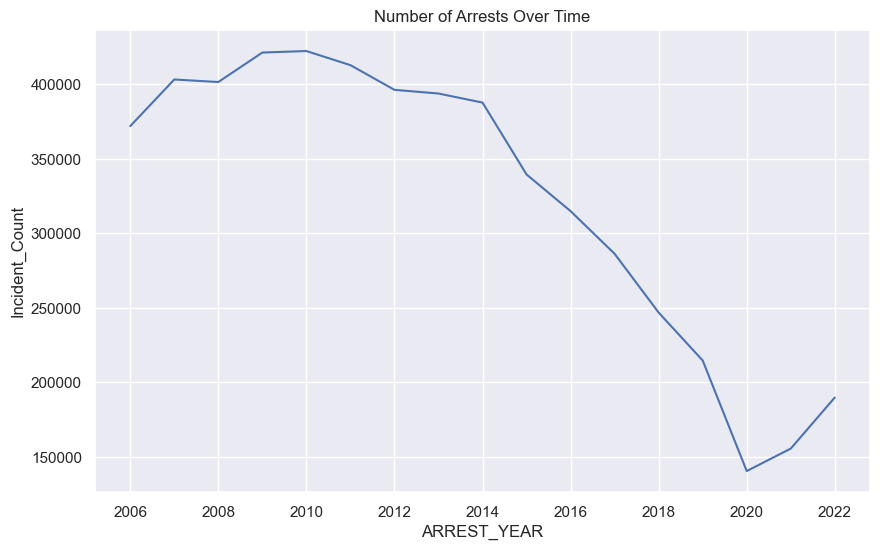

In [92]:
# Arrests over time
df_arrests['ARREST_YEAR'] = df_arrests['ARREST_DATE'].dt.year
yearwise_counts = df_arrests.groupby('ARREST_YEAR').size().reset_index(name='Incident_Count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearwise_counts, x='ARREST_YEAR', y='Incident_Count')
plt.title('Number of Arrests Over Time')
#print(year_counts)
plt.show()

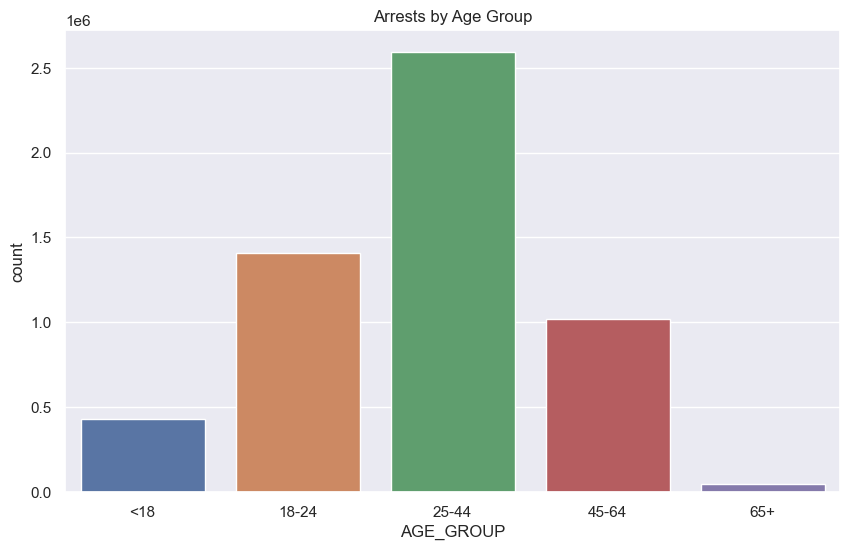

In [93]:
# Arrests by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arrests, x='AGE_GROUP', order=['<18', '18-24', '25-44', '45-64', '65+'])
plt.title('Arrests by Age Group')
plt.show()

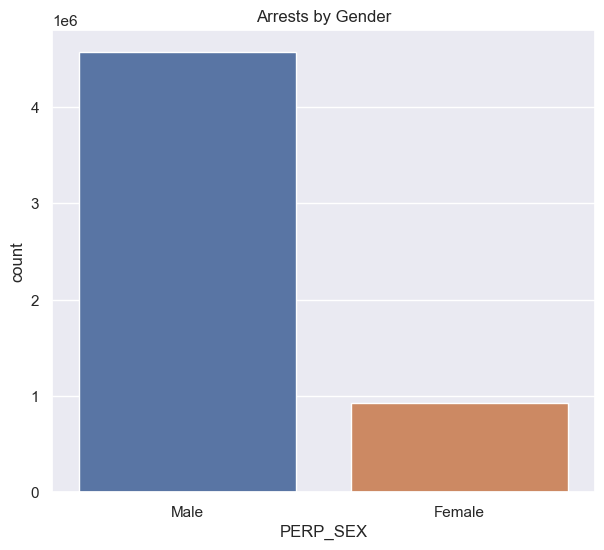

In [94]:
# Arrests by gender
plt.figure(figsize=(7, 6))
sns.countplot(data=df_arrests, x='PERP_SEX')
plt.title('Arrests by Gender')
plt.show()

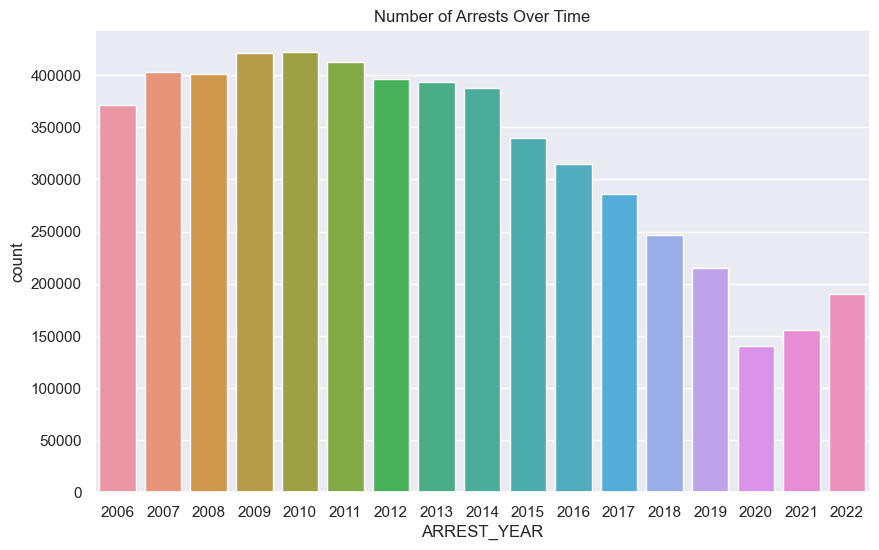

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arrests, x='ARREST_YEAR')
plt.title('Number of Arrests Over Time')
plt.show()

## Conclusion

The analysis of NYPD arrest data from 2006 to 2022 shows that the top three boroughs with the highest number of arrests are Brooklyn, Bronx, and Manhattan. Brooklyn had the most arrests with 46,825, followed by Bronx with 39,957 arrests, and Manhattan with 39,652. The age group with the most arrests ranges between 25-44 years old. The most common perpetrator demographics for arrests are Black, Male, White Hispanic, and Black Hispanic Male.

While total arrests peaked in 2010, there has been an overall declining trend since 2016. The year 2020 saw the lowest number of arrests, likely due to the COVID-19 pandemic, but arrests have slowly increased again in the years after.


## Recommendations:

1.  Increase police resources and community engagement programs in the top 3 boroughs of Brooklyn, Bronx, and Manhattan to further reduce crime and arrests.

2.  Explore socioeconomic factors and opportunities for the 25-44 age group to steer at-risk individuals away from criminal activity.

3. Examine potential biases and disproportionate policing of Black, Hispanic, and male populations that may contribute to higher arrest rates compared to the overall demographics of NYC.

4. Identify effective policies and precinct-level initiatives implemented since 2014 that contributed to the reduction in arrests, and expand those efforts.


~ In summary, while arrests have declined in recent years, focused efforts in key boroughs, age groups, and supporting disadvantaged demographic groups can potentially sustain and improve on the downward trend through fair and unbiased policing.~

### Challenges

1. Handling Null values
2. Incorrect data type
3. Misspelling 
4. 